<a href="https://colab.research.google.com/github/gsvn32/fakenews-classification/blob/main/fakenews-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv('/content/news.csv')
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#Step 1: Data Preparation

In [ ]:
# Function for Data cleaning
def clean_text(text):
    text = re.sub(r'\W', ' ', text)    # Remove non-word characters
    text = text.lower()                # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Combine the title & text
df['CombinedText'] = df['title'] + ' ' + df['text']
# Clean the data
df['CombinedText'] = df['CombinedText'].apply(clean_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['CombinedText'], df['label'], test_size=0.2, random_state=42)

### Step 2: Exploratory Data Analysis (EDA)

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


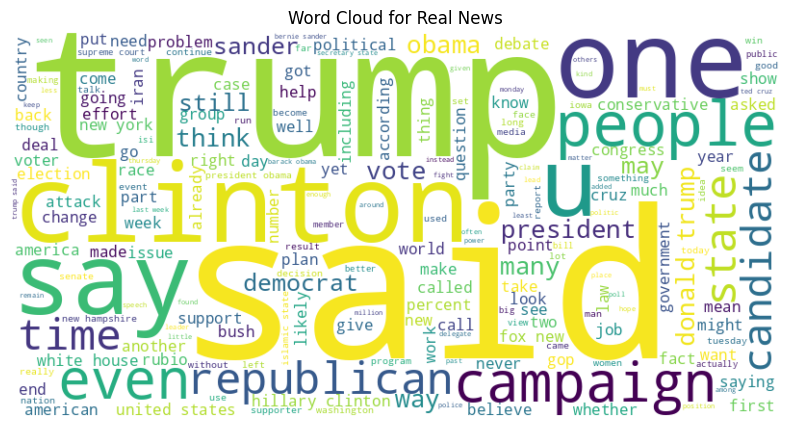

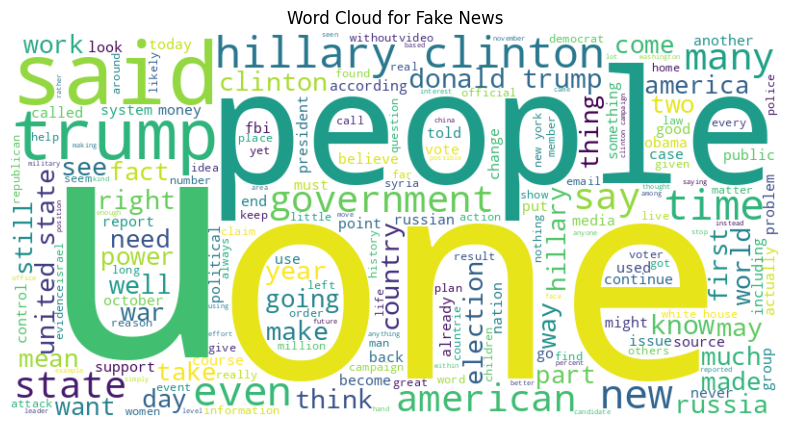

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Class distribution
print(df['label'].value_counts())

# Word cloud for real news
real_news = ' '.join(df[df['label'] == 'REAL']['CombinedText'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

# Word cloud for fake news
fake_news = ' '.join(df[df['label'] == 'FAKE']['CombinedText'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

###Step 3: Feature Extraction and Label Encoding

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Fit on training labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

###Step 4: Model Selection and Training

In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train_encoded)

LogisticRegression()

###Step 5: Model Evaluation

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test_encoded, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test_encoded, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       628
           1       0.93      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:
[[581  47]
 [ 59 580]]


###Step 6: Model Interpretation and Analysis

In [ ]:
# Identify the most important features (words)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_.flatten()

# Get top 10 features for each class
top_positive_coefficients = np.argsort(coefficients)[-10:]
top_negative_coefficients = np.argsort(coefficients)[:10]

print("Top positive features:")
for feature in top_positive_coefficients:
    print(f'{feature_names[feature]}: {coefficients[feature]:.4f}')

print("\nTop negative features:")
for feature in top_negative_coefficients:
    print(f'{feature_names[feature]}: {coefficients[feature]:.4f}')

# Error analysis
misclassified_indices = np.where(y_pred != y_test_encoded)[0]
print(f'Misclassified examples: {len(misclassified_indices)}')
for i in misclassified_indices[:5]:  # Show first 5 misclassified examples
    print(f'\nText: {X_test.iloc[i]}')
    print(f'Predicted: {y_pred[i]}, Actual: {y_test_encoded[i]}')

Top positive features:
islamic: 2.1204
iran: 2.1254
sanders: 2.1934
conservative: 2.2800
debate: 2.3558
state: 2.5480
cruz: 2.6120
candidates: 2.7090
gop: 2.8062
said: 6.3821

Top negative features:
2016: -4.2961
hillary: -4.0480
october: -3.9584
us: -2.9547
election: -2.8117
november: -2.5840
article: -2.4454
podesta: -2.1822
com: -2.0822
share: -2.0785
Misclassified examples: 106

Text: breaking trump vp plane slides runway laguardia airport nyc 0 comments gop vp candidate mike pence trump plane slid runway laguardia airport thursday evening landing mud far east river trump plane stopped mud broke thin veneer concrete designed give way keep planes sliding river one injured incident authorities say could fatalities plane ended water ktla 5 reports rescue crews responding scene incident took place rainy night city press pool back aircraft could feel plane fishtailing touched sliding runway coming sharp halt grass side runway could feel plane moving natural landing experience cnn elizab